In [1]:
#import libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk

%matplotlib inline

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read the data files
train_tweets = pd.read_csv('train_E6oV3lV.csv') 

test_tweets = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
#Have a look and check the first 5 lines of the train_tweets dataframe
train_tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#Have a look and check the first 5 lines of test_tweets dataframe
test_tweets.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [3]:
tot = train_tweets.append(test_tweets, ignore_index=True)
print (tot.head())
print (tot.tail())

   id  label                                              tweet
0   1    0.0   @user when a father is dysfunctional and is s...
1   2    0.0  @user @user thanks for #lyft credit i can't us...
2   3    0.0                                bihday your majesty
3   4    0.0  #model   i love u take with u all the time in ...
4   5    0.0             factsguide: society now    #motivation
          id  label                                              tweet
49154  49155    NaN  thought factory: left-right polarisation! #tru...
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...
49157  49158    NaN  happy, at work conference: right mindset leads...
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...


C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## Basic pre-processing 

Before analysing the text feature, we need to preprocess the text data, so, we have better input data when performing machine learning or other analysis.
First, I remove all the @user because @user is too many times in the text feature, then, I remove punctuations, numbers, special characters and words with length 3 or less. Moreover I remove stop words and after that, I use the tokenization to create a bag of words and the lemmatization.

In [4]:
# remove twitter handles (@user)
tot['new_tweet'] = tot['tweet'].str.replace("@[\w]*", " ")
tot.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [5]:
# remove special characters, numbers, punctuations
tot['new_tweet'] = tot['new_tweet'].str.replace("[^a-zA-Z#]", " ")
tot.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [6]:
#Remove all the words with length 3 or less
tot['new_tweet'] = tot['new_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tot.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [7]:
# Remove of Stop Words
stop = text.ENGLISH_STOP_WORDS
tot['new_tweet'] = tot['new_tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
tot.head()

,id,label,tweet,new_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


Tokenization refers to divide the text into a sequence of words or sentences.
Lemmatization is the process of reducing a group of words into their lemma or dictionary form. It's a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, I prefer using lemmatization over stemming.


In [8]:
# Instantiate the Word tokenizer & Word lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Apply the word lemmatizer function to data
tot['token_tweet'] = tot['new_tweet'].apply(lemmatize_text)
tot.head()

,id,label,tweet,new_tweet,token_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,"[thanks, #lyft, credit, cause, offer, wheelcha..."
2,3,0.0,bihday your majesty,bihday majesty,"[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,#model love time,"[#model, love, time]"
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,"[factsguide, society, #motivation]"


In [9]:
def string_unlist(strlist):
    return " ".join(strlist)

tot["tokenized_unlist"] = tot["token_tweet"].apply(string_unlist)
tot.head()

,id,label,tweet,new_tweet,token_tweet,tokenized_unlist
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,"[thanks, #lyft, credit, cause, offer, wheelcha...",thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty,"[bihday, majesty]",bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love time,"[#model, love, time]",#model love time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,"[factsguide, society, #motivation]",factsguide society #motivation


## The most words used

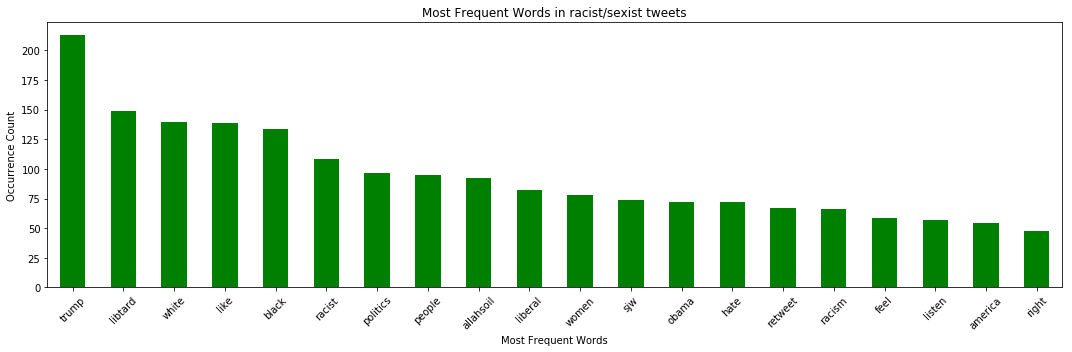

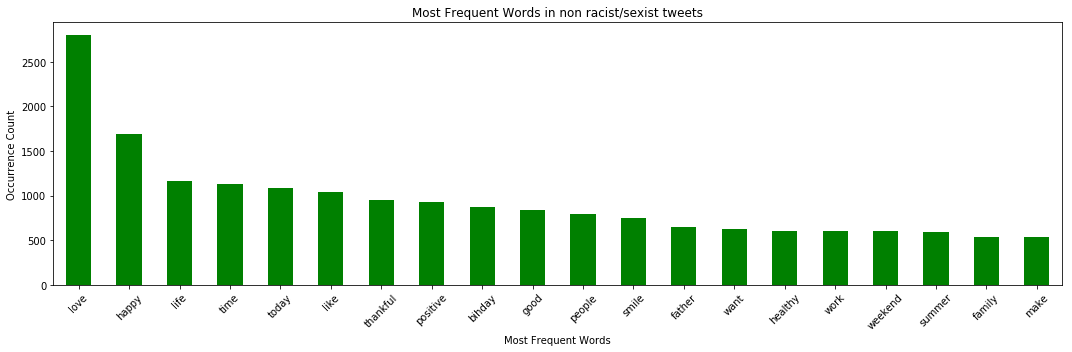

In [23]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#Filter out data removing the NaN values in label feature
tot_new = tot[tot['label'].notnull()]

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

#Study of Most Frequent Words in label 1 and label 0
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

title ='Most Frequent Words in racist/sexist tweets'
temp = tot_new['new_tweet'][tot_new.label.astype(int) == 1]

# Bar Chart
ax = wordfreq(preprocessing(temp), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()


#Label = 0
title ='Most Frequent Words in non racist/sexist tweets'
temp_Nrac = tot_new['new_tweet'][tot_new.label.astype(int) == 0]

# Bar Chart
ax = wordfreq(preprocessing(temp_Nrac), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()


Plot the wordcloud to show the most oftenly used words in the racist/sexist tweets.

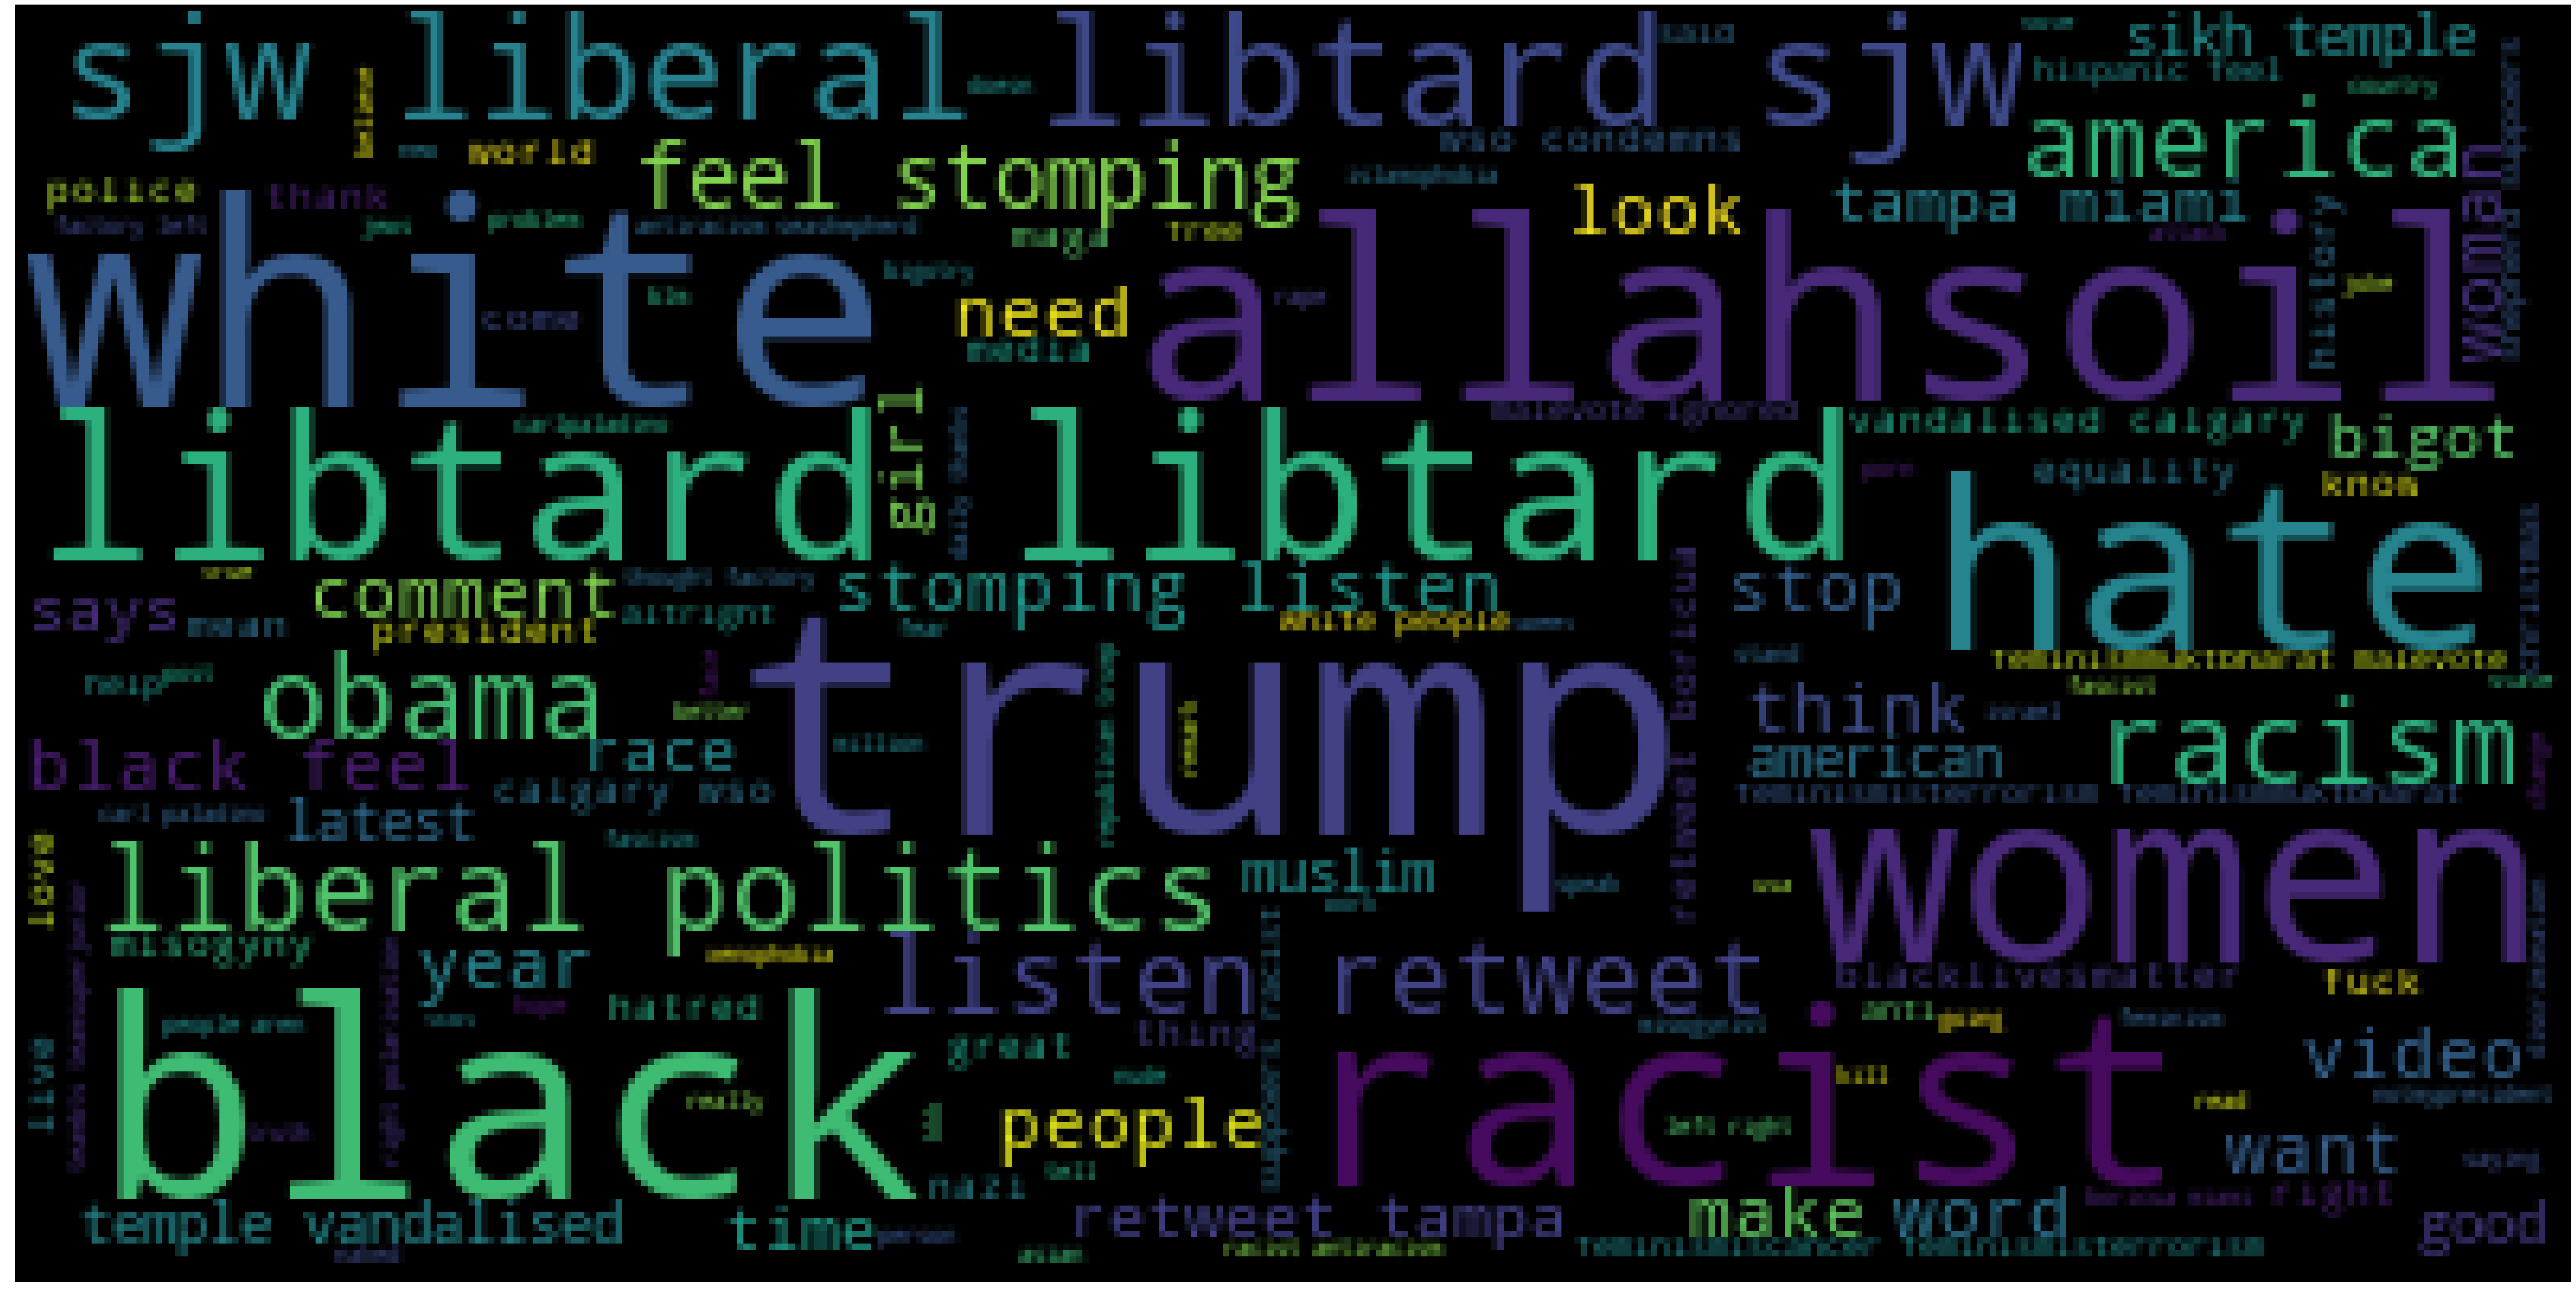

In [13]:
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    
wc(temp,'black','Most Used Words')

Plot the wordcloud to show the most oftenly used words in the non racist/sexist tweets.

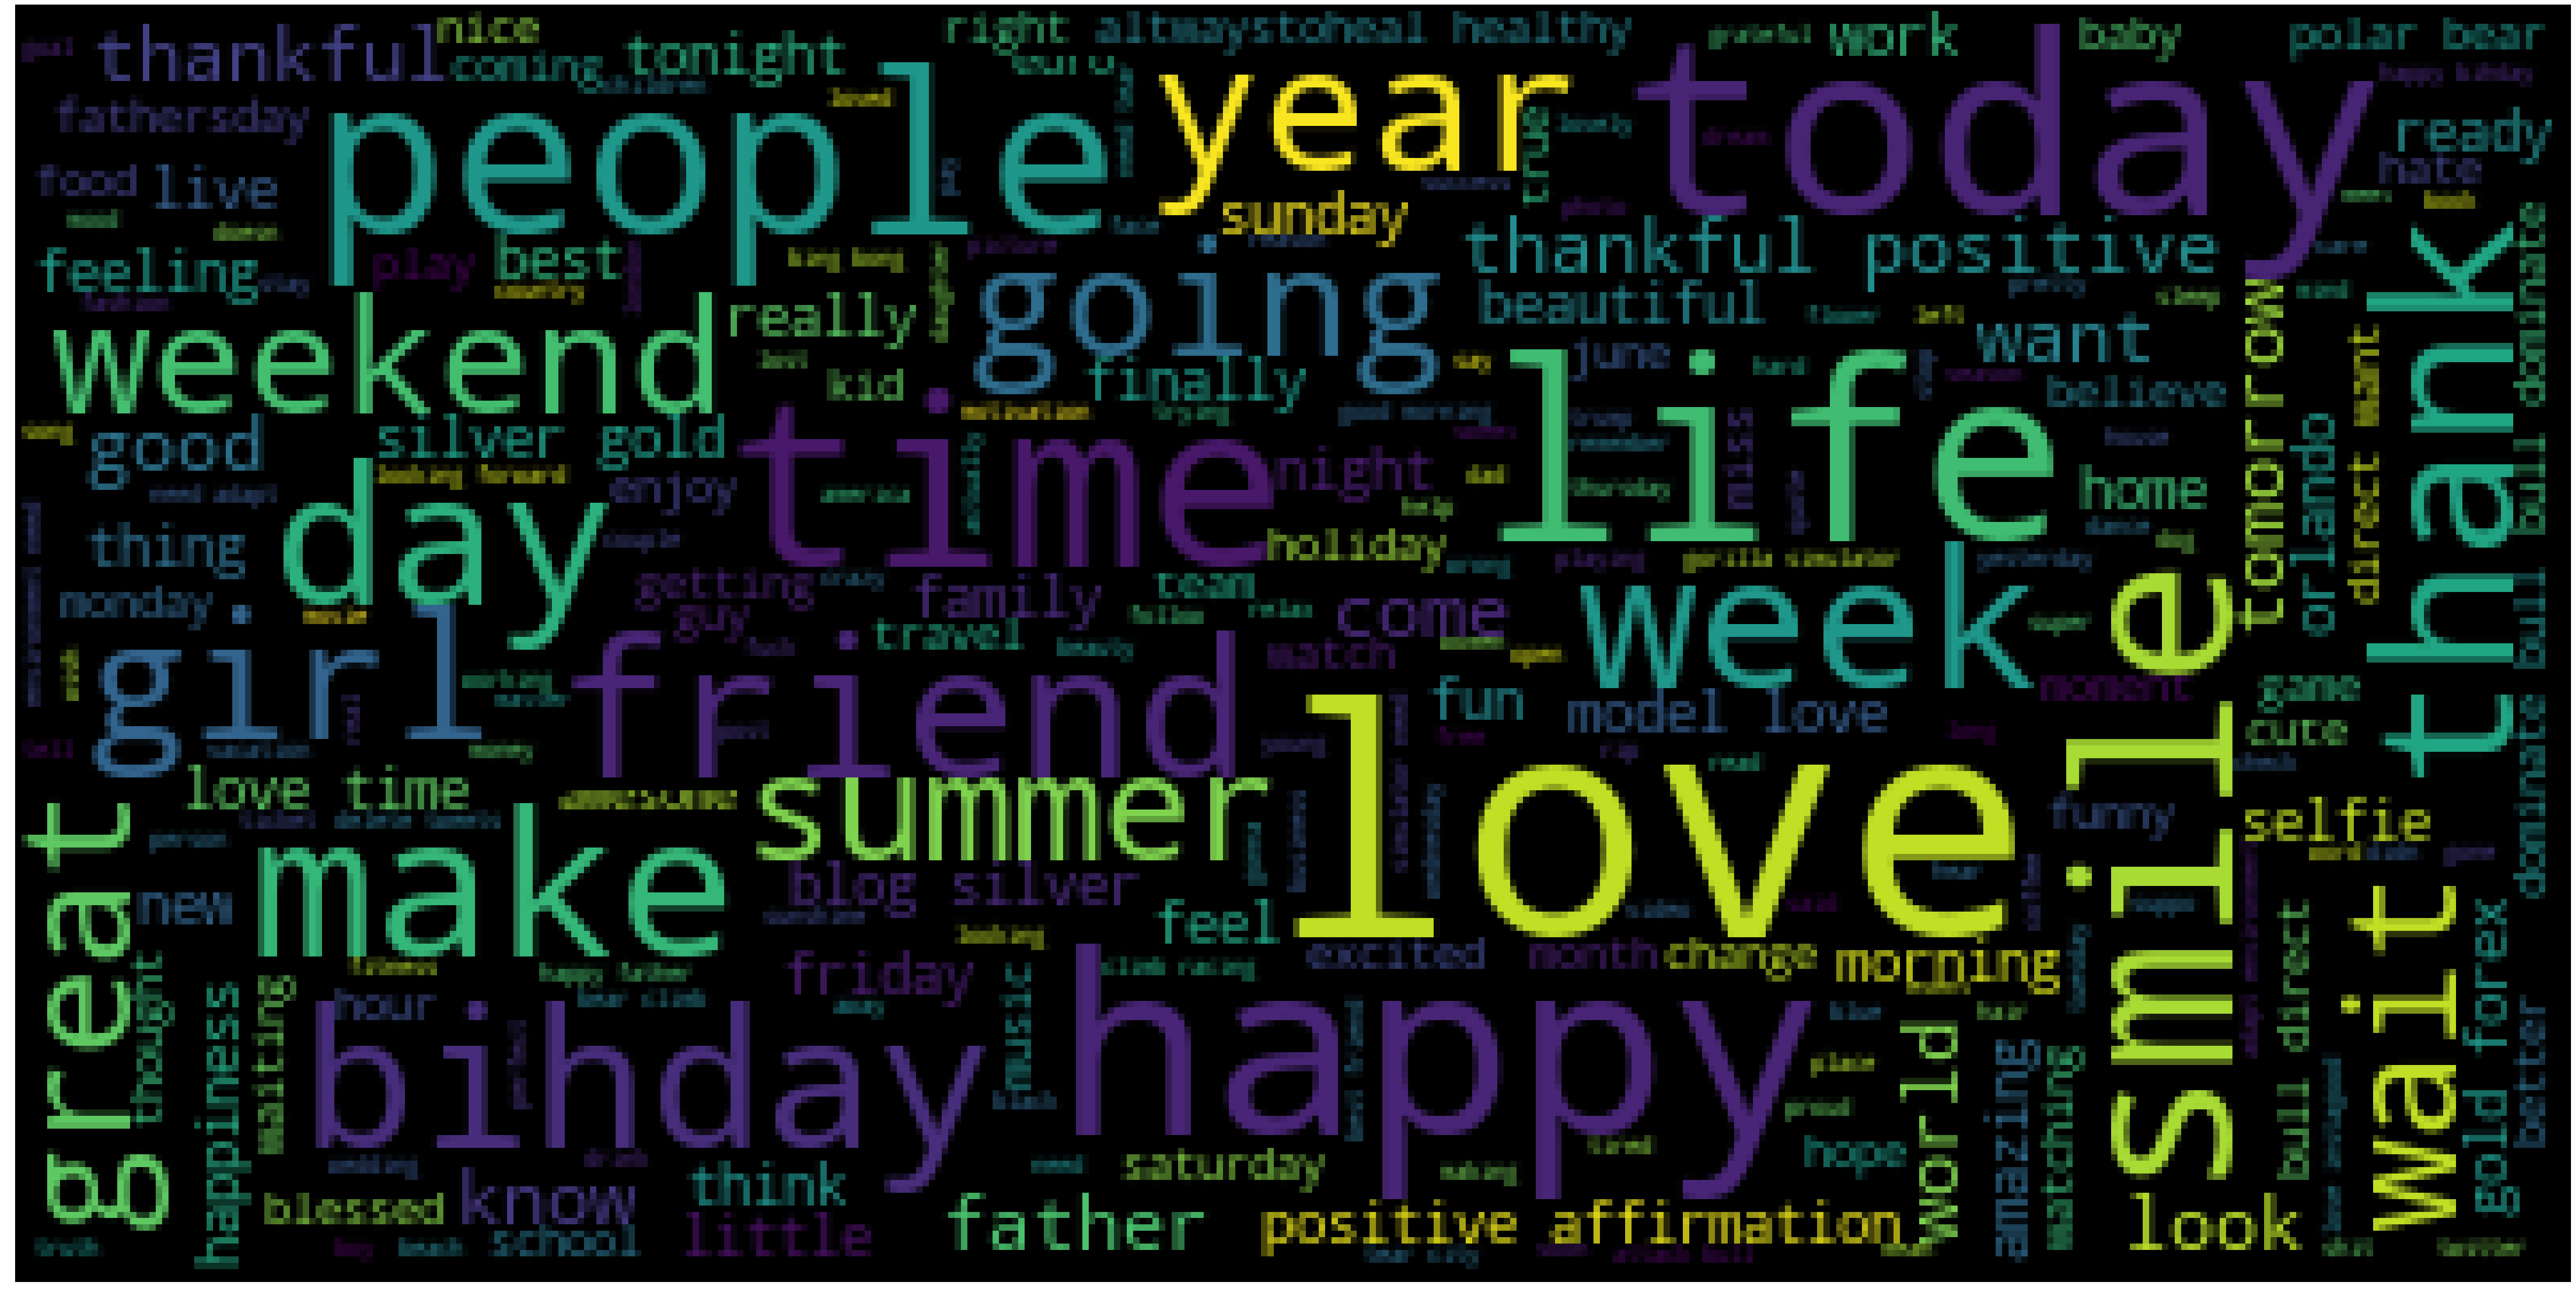

In [16]:
wc(temp_Nrac,'black','Most Used Words')

The most common words used in general without dividing the tweets in 2 groups

In [17]:
#In general
words = tot['new_tweet']

# The most common words used
freq_common = pd.Series(' '.join(preprocessing(words)).split()).value_counts()[:20]
print ('The most common words used:')
print(freq_common)



The most common words used:
love        4375
happy       2655
life        1797
time        1780
like        1725
today       1695
thankful    1438
positive    1429
people      1362
bihday      1359
good        1346
smile       1125
father      1002
want         992
healthy      970
work         923
weekend      907
summer       888
make         867
family       848
dtype: int64


Using TF-IDF 

In [18]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Take the title text
text = tot['new_tweet']

# Create the vectorizer method
tfidf_vec = TfidfVectorizer(stop_words='english')

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit(text)


# encode document
vector = text_tfidf.transform(text) 


#Print the first 20 words based on tfidf score

indices = np.argsort(tfidf_vec.idf_)[::1]
features = tfidf_vec.get_feature_names()
top_features = [features[i] for i in indices[:20]]
print (top_features)


['love', 'happy', 'just', 'time', 'life', 'today', 'like', 'positive', 'good', 'people', 'bihday', 'smile', 'want', 'healthy', 'father', 'make', 'summer', 'beautiful', 'family', 'weekend']


TF-IDF

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')   
text_counts = count_vect.fit_transform(tot['new_tweet'])
feat_name =  count_vect.get_feature_names()
print (text_counts.shape)

(49159, 47071)


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_counts)
print (text_tfidf.shape)

(49159, 47071)


In [21]:
# Check TF-IDF mean score for whole dataset


# TF-IDF mean score excluding 0s

mean_tfidf_score = np.true_divide(text_tfidf.sum(0),(text_tfidf != 0).sum(0))


mean_tfidf_score_list = np.array(mean_tfidf_score)[0].tolist()

# Function to get the maximum tf-idf scores 

def f(a,N):
    return np.argsort(a)[::-1][:N]


max_tfidf_indices_list = f(mean_tfidf_score_list,10)


# TF-IDF mean score including 0s

mean_tfidf_score_with0s = np.mean(text_tfidf , axis=0)

mean_tfidf_score_with0s_list = np.array(mean_tfidf_score_with0s)[0].tolist()
max_tfidf_with0s_indices_list = f(mean_tfidf_score_with0s_list,20)



In [22]:
# TF-IDF for each label
tot_1label = tot_new[tot_new['label'] == 1]
tot_0label = tot_new[tot_new['label'] == 0]


# TF-idf for label 1 

print ("------ The words with highest TF-IDF scores in racist/sexist tweets​ ------- ")

text_counts_1label = count_vect.fit_transform(tot_1label['new_tweet'])
feat_name_1label =  count_vect.get_feature_names()
text_tfidf_1label = tfidf_transformer.fit_transform(text_counts_1label)

mean_tfidf_score_1label = np.mean(text_tfidf_1label, axis=0)

mean_tfidf_score_1label_list = np.array(mean_tfidf_score_1label)[0].tolist()
max_tfidf_1label_indices_list = f(mean_tfidf_score_1label_list,20)

for i in range(len(max_tfidf_1label_indices_list)):
    print ( feat_name_1label[max_tfidf_1label_indices_list[i]], mean_tfidf_score_1label_list[max_tfidf_1label_indices_list[i]] )


    
# TF-idf for label 0 

print ("------ The words with highest TF-IDF scores in non racist/sexist tweets ------- ")

text_counts_0label = count_vect.fit_transform(tot_0label['new_tweet'])
feat_name_0label =  count_vect.get_feature_names()
text_tfidf_0label = tfidf_transformer.fit_transform(text_counts_0label)

mean_tfidf_score_0label = np.mean(text_tfidf_0label , axis=0)

mean_tfidf_score_0label_list = np.array(mean_tfidf_score_0label)[0].tolist()
max_tfidf_0label_indices_list = f(mean_tfidf_score_0label_list,20)



for i in range(len(max_tfidf_0label_indices_list)):
    print ( feat_name_0label[max_tfidf_0label_indices_list[i]], mean_tfidf_score_0label_list[max_tfidf_0label_indices_list[i]] )

    

------ The words with highest TF-IDF scores in racist/sexist tweets​ ------- 
libtard 0.02500670705438177
trump 0.018681949638143094
like 0.015155650263631313
black 0.014419599273392552
politics 0.014171174538343783
white 0.013482704523406289
liberal 0.013084045753210823
racist 0.012848190761905725
sjw 0.012606844714502826
allahsoil 0.010274405454052648
people 0.01025015898434261
retweet 0.010176871573075019
feel 0.009158873041385716
just 0.009029954140410664
women 0.009026075587758448
listen 0.008833244926433942
obama 0.008164820210726774
hate 0.008074899320431957
stomping 0.008033821566954
miami 0.0076127306144295765
------ The words with highest TF-IDF scores in non racist/sexist tweets ------- 
love 0.020083247842514466
time 0.012231809603909575
happy 0.011998968542865744
thankful 0.011376936777399534
positive 0.010805958418835429
just 0.009542807713739576
life 0.009005355999115014
today 0.008575770411944607
bihday 0.008449802858609808
model 0.008078679629477042
like 0.007809603612

## Model: Machine Learning 

### Goal: Can we predict label based on the words used in the tweet?

In [10]:
train = tot.iloc[:31962,:]
test_set = tot.iloc[31962:,:]

In [11]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

#### Run Cross validation to compare and set the best algorithm to use

In [12]:
X = train['new_tweet']
y = train.label


# Use CountVectorizer
transformer=CountVectorizer(analyzer=text_process)
X = transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [63]:
# 5-fold cross-validation with K=2 for KNN (the n_neighbors parameter)

knn = KNeighborsClassifier(n_neighbors=2)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=5 for 5 folds

print ('F1 score:')
print (cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_weighted').mean())


F1 score:
0.9241296193263709


In [67]:
# Random Forest Classifier
ran = RandomForestClassifier(n_estimators=200) 

print ('F1 score:')
print (cross_val_score(ran, X_train, y_train, cv=5, scoring='f1_weighted').mean())

F1 score:
0.9567455822018186


In [66]:
# 5-fold cross-validation with logistic regression
logreg = LogisticRegression()

print ('F1 score:')
print (cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1_weighted').mean())

F1 score:
0.9537871537830245


In [13]:
svc = LinearSVC()

print ('F1 score:')
print(cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_weighted').mean())

F1 score:
0.9589979586381354


In [62]:
nb = MultinomialNB()

print ('F1 score:')
print(cross_val_score(nb, X_train, y_train, cv=5, scoring='f1_weighted').mean())

F1 score:
0.9412163774601279


The best algorithm is Linear Support Vector Classification with an accuracy of 95.9%

#### So, now that I find the algorithm (Linear SVC), I fit the model

In [14]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2969   40]
 [  66  122]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      3009
        1.0       0.75      0.65      0.70       188

avg / total       0.97      0.97      0.97      3197



#### I check the prediction.

In [15]:
y_pred[-20:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0.])

In [36]:
train.tail(20)

,id,label,tweet,new_tweet,token_tweet
31942,31943,0.0,this week is flying by #humpday - #wednesday...,week flying #humpday #wednesday #kamp #ucsd,"[week, flying, #humpday, #wednesday, #kamp, #u..."
31943,31944,0.0,@user modeling photoshoot this friday yay #mo...,modeling photoshoot friday #model #follow #emo,"[modeling, photoshoot, friday, #model, #follow..."
31944,31945,0.0,you're surrounded by people who love you (even...,surrounded people love deserve hateful,"[surrounded, people, love, deserve, hateful]"
31945,31946,0.0,feel like... ðð¶ð #dog #summer #hot #h...,feel like #dog #summer #hot #help #sun #day #more,"[feel, like, #dog, #summer, #hot, #help, #sun,..."
31946,31947,1.0,@user omfg i'm offended! i'm a mailbox and i'...,omfg offended mailbox proud #mailboxpride #lib...,"[omfg, offended, mailbox, proud, #mailboxpride..."
31947,31948,1.0,@user @user you don't have the balls to hashta...,balls hashtag weasel away lumpy tony dipshit,"[ball, hashtag, weasel, away, lumpy, tony, dip..."
31948,31949,1.0,"makes you ask yourself, who am i? then am i a...",makes anybody thank,"[make, anybody, thank]"
31949,31950,0.0,hear one of my new songs! don't go - katie ell...,hear songs katie ellie #youtube #original #mus...,"[hear, song, katie, ellie, #youtube, #original..."
31950,31951,0.0,"@user you can try to 'tail' us to stop, 'butt...",tail stop butt just having good time #goldenre...,"[tail, stop, butt, just, having, good, time, #..."
31951,31952,0.0,i've just posted a new blog: #secondlife #lone...,just posted blog #secondlife #lonely #neko,"[just, posted, blog, #secondlife, #lonely, #neko]"


Quite well. the model predict two tweets over 20 no racist (label 0) but the true label is 1 (False Negative).

#### Now, I predict the label for my test dataset

In [35]:
tvect = CountVectorizer(analyzer=text_process)

X = tvect.fit_transform(train['new_tweet'])

#classifier = LinearSVC()
svc.fit(X, train.label)


X_test=tvect.transform(test_set['new_tweet'])
prediction = svc.predict(X_test)

In [38]:
# Save for the competition 
data_to_submit = pd.DataFrame({
    'Id':test_tweets['id'],
    'label':prediction
})
data_to_submit.to_csv('test_predictions.csv' , index = False)


In [17]:
test_set['label'] = prediction
test_set.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,label,tweet,new_tweet,token_tweet,tokenized_unlist
31962,31963,0.0,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...,"[#studiolife, #aislife, #requires, #passion, #...",#studiolife #aislife #requires #passion #dedic...
31963,31964,0.0,@user #white #supremacists want everyone to s...,#white #supremacists want #birds #movie,"[#white, #supremacists, want, #birds, #movie]",#white #supremacists want #birds #movie
31964,31965,0.0,safe ways to heal your #acne!! #altwaystohe...,safe ways heal #acne #altwaystoheal #healthy #...,"[safe, way, heal, #acne, #altwaystoheal, #heal...",safe way heal #acne #altwaystoheal #healthy #h...
31965,31966,0.0,is the hp and the cursed child book up for res...,cursed child book reservations #harrypotter #p...,"[cursed, child, book, reservation, #harrypotte...",cursed child book reservation #harrypotter #po...
31966,31967,0.0,"3rd #bihday to my amazing, hilarious #nephew...",#bihday amazing hilarious #nephew ahmir uncle ...,"[#bihday, amazing, hilarious, #nephew, ahmir, ...",#bihday amazing hilarious #nephew ahmir uncle ...


In [18]:
#Save the new dataframe as 'Test_new_ML.csv'
test_set.to_csv('Test_new_ML.csv')

## Deep Learning

In [20]:
#train = tot.iloc[:31962,:]
#test_set = tot.iloc[31962:,:]

In [12]:
train.head()

,id,label,tweet,new_tweet,token_tweet,tokenized_unlist
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,"[thanks, #lyft, credit, cause, offer, wheelcha...",thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty,"[bihday, majesty]",bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love time,"[#model, love, time]",#model love time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,"[factsguide, society, #motivation]",factsguide society #motivation


I start to build my deep learning model

In [22]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Flatten
from keras.layers import Dropout

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [89]:
samples = train["tokenized_unlist"].tolist()
maxlen = 100 
max_words = 3000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 34864 unique tokens.


In [90]:
labels = to_categorical(train['label'])
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (31962, 100)
Shape of label tensor: (31962, 2)


In [91]:
indices = np.arange(train.shape[0])
#np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [92]:
training_samples = 28765
validation_samples = 3197
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: validation_samples] 
y_val = labels[training_samples: validation_samples]
x_test = data[validation_samples:]
y_test = labels[validation_samples:]
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
np.random.seed(1) # for reproducibility

In [112]:
def build_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
    return model

In [113]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save("model.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          300000    
_________________________________________________________________
flatten_13 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 500)               5000500   
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 502       
Total para

In [114]:
y_pred = model.predict_classes(x_test)

In [115]:
y_pred[-5:]

array([0, 0, 0, 1, 0], dtype=int64)

In [72]:
train.tail(5)

,id,label,tweet,new_tweet,token_tweet,tokenized_unlist
31957,31958,0.0,ate @user isz that youuu?ðððððð...,youuu,[youuu],youuu
31958,31959,0.0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap mantle genuin...,"[nina, turner, airwave, trying, wrap, mantle, ...",nina turner airwave trying wrap mantle genuine...
31959,31960,0.0,listening to sad songs on a monday morning otw...,listening songs monday morning work,"[listening, song, monday, morning, work]",listening song monday morning work
31960,31961,1.0,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemns,"[#sikh, #temple, vandalised, #calgary, #wso, c...",#sikh #temple vandalised #calgary #wso condemns
31961,31962,0.0,thank you @user for you follow,thank follow,"[thank, follow]",thank follow


The result seems good and also the accuracy is really high. 

In [99]:
samplestest = test_set["tokenized_unlist"].tolist()
maxlen = 100 
max_words = 3000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(samplestest)
sequences = tokenizer.texts_to_sequences(samplestest)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data_test = pad_sequences(sequences, maxlen=maxlen)

Found 23454 unique tokens.


In [100]:
y_pred = model.predict_classes(data_test)

In [101]:
y_pred[-10:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [102]:
test_set['label_DL'] = y_pred

#Save the new dataframe as 'Test_new_DL.csv'
test_set.to_csv('Test_new_DL.csv')

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
